<a href="https://colab.research.google.com/github/JuanPabloJP/Data-visualization/blob/main/2%20Convolutional%20Filters/conv_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data visualization: Concolutional Filters
**Juan Pablo Hernádez Lozano**

En esta tarea aplicamos una función de convolución en dos dimensiones la cual pueda aplicar diversos filtros en los tres canales de una imagen dada.

Empezamos cargando las librerías necesarias.

In [1]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

Carcagamos la imagen correspondientes:

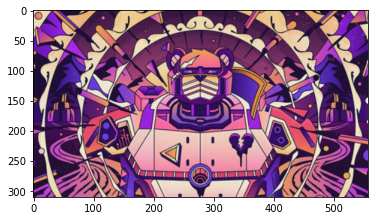

In [2]:
image = cv2.imread('/content/image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1)
plt.imshow(image)

Definimos algunos filtros (vistos en clase)

In [3]:
vertical_edge_filter = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1],
  ])

horizontal_edge_filter = np.array(
  [
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1],
  ])

edge_filter = np.array(
  [
    [1, 1, 1],
    [1, -7, 1],
    [1, 1, -1],
  ])

sharpen_filter = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0],
  ])

gaussian_filter = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1],
  ])

filters = [vertical_edge_filter, horizontal_edge_filter, edge_filter, sharpen_filter, gaussian_filter]

Definimos la función de convolución que aplica el filtro establecido (Kernel) a cada uno de los canales de la imagen. Notamos que hacemos uso de la función de padding de numpy para agregar un marco a cada uno de los bordes de la imagen. Esta función de padding tiene distintas configuraciones pero en esta implementación se usa `constant`que agrega ceros.

In [4]:
def convolution2d(image, kernel, pad='constant'):
    m, n = kernel.shape
    chanels = image.shape[-1]
    new_image = np.zeros((image.shape[0], image.shape[1],chanels))

    for chanel in range(chanels):
        image_i = np.pad(image[:,:,chanel], [(1, 1), (1, 1)], mode=pad)
        y, x = image_i.shape
        y_out = y - m + 1
        x_out  = x - n + 1
        new_array = np.zeros((y_out, x_out))
        for i in range(y_out):
            for j in range(x_out):
                new_array[i][j] = np.sum(image_i[i:i+m, j:j+n]*kernel)
        
        new_image[:,:,chanel] = new_array

    return new_image

Aplicamos el filtro para encontrar lineas horizontales:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


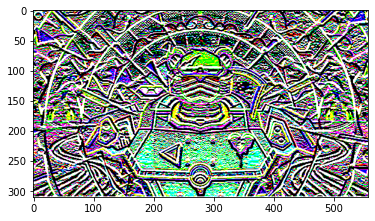

In [5]:
plt.imshow(convolution2d(image,horizontal_edge_filter))

Aplicamos el filtro para encontrar lineas verticales:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


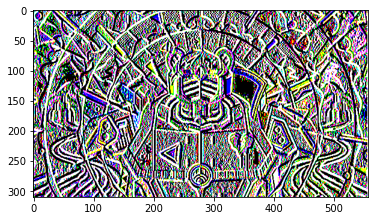

In [6]:
plt.imshow(convolution2d(image,vertical_edge_filter))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


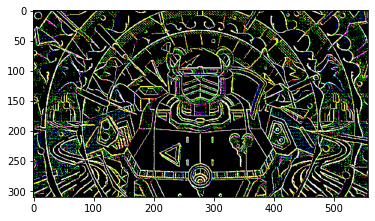

In [7]:
plt.imshow(convolution2d(image,edge_filter))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


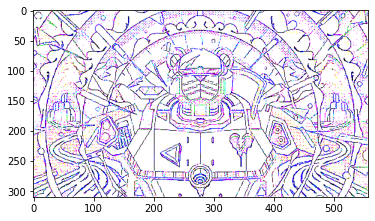

In [8]:
plt.imshow(convolution2d(image,sharpen_filter))